In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline
import datetime as dt

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start=dt.datetime(2010,4,1)
end=dt.datetime(2020,4,1)
#Taking Amazon stock data
ticker = 'AMZN' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, 'yahoo', start , end)['Adj Close']
#COnsidering log returns as only 1 company stock is considered
log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.head()

,AMZN
Date,
2010-03-31,NaN
2010-04-01,-0.029601
2010-04-05,-0.002431
2010-04-06,0.030483
2010-04-07,-0.005103


In [4]:
log_returns.tail()

,AMZN
Date,
2020-03-26,0.036267
2020-03-27,-0.028734
2020-03-30,0.033051
2020-03-31,-0.007272
2020-04-01,-0.021787


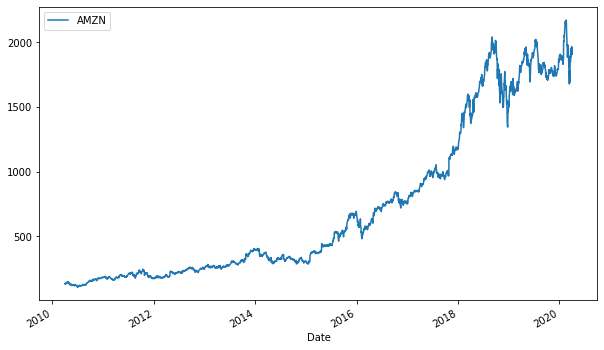

In [5]:
#Plotting Price of the stock
data.plot(figsize=(10, 6))

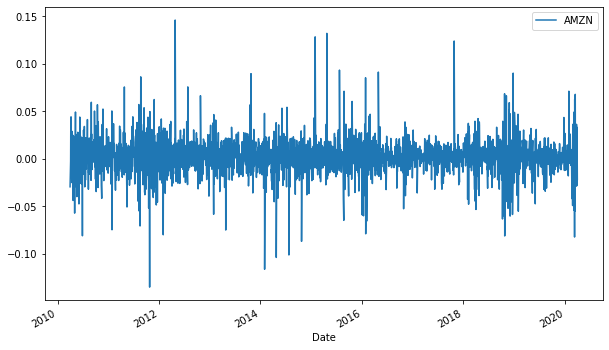

In [6]:
#Plotting the returns of the stock
log_returns.plot(figsize = (10, 6))

Predicting the stock price by Brownian Motion

In [7]:
u = log_returns.mean()
var = log_returns.var()

In [8]:
#drift is the best approximation of future rates of return of a stock
drift = u - (0.5 * var)
drift

AMZN    0.000855
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

AMZN    0.019749
dtype: float64

In [10]:
np.array(drift)

array([0.00085451])

In [11]:
stdev.values

array([0.01974886])

Daily returns= e^r

r = drift + stdev * z

In [12]:
#intervals are considered 1000 to predict the stock prices for 1000 days
#iterations are 10 to get 10 series of future stock prices
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [13]:
daily_returns

array([[0.98410551, 1.03166743, 0.97267726, ..., 0.94294083, 0.98716265,
        1.00871043],
       [0.99619979, 0.98816378, 0.99078131, ..., 1.02750848, 0.97286422,
        0.97964203],
       [0.98251232, 1.01217668, 1.03169061, ..., 1.02453704, 0.98947408,
        1.00875197],
       ...,
       [1.03474039, 1.00813913, 1.00797272, ..., 0.99086097, 0.99478999,
        0.99080849],
       [0.98907699, 1.00532339, 0.98434049, ..., 1.01554412, 1.02163457,
        1.00518398],
       [0.96116236, 0.98316888, 0.99826886, ..., 1.00068275, 0.99150748,
        0.99643986]])

In [14]:
#Taking the last data from daily_returns as it the latest value
S0 = data.iloc[-1]

𝑆(𝑡+1) = 𝑆(𝑡) ⋅ 𝑑𝑎𝑖𝑙𝑦_𝑟𝑒𝑡𝑢𝑟𝑛(𝑡+1)

In [15]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [16]:
#Prediction of the stock prices of Amazon
price_list

array([[1907.69995117, 1907.69995117, 1907.69995117, ..., 1907.69995117,
        1907.69995117, 1907.69995117],
       [1900.45028495, 1885.11999096, 1890.11346324, ..., 1960.17788257,
        1855.93303303, 1868.8630508 ],
       [1867.21581201, 1908.07448543, 1950.01230354, ..., 2008.27485299,
        1836.39762334, 1885.21929144],
       ...,
       [7121.56387764, 5780.87035667, 2840.32610827, ..., 7363.64352389,
        2322.21148607, 4186.98278204],
       [7043.77494067, 5811.64416363, 2795.84798993, ..., 7478.10488303,
        2372.45153017, 4208.688037  ],
       [6770.21132193, 5713.82765978, 2791.00797379, ..., 7483.21052654,
        2352.30344229, 4193.70450736]])

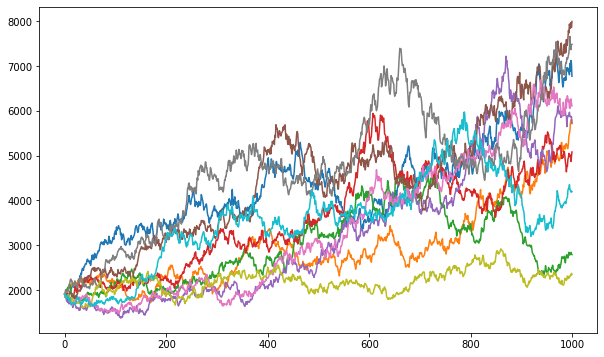

In [17]:
#Plotting the predicted price list
plt.figure(figsize=(10,6))
plt.plot(price_list)